In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Source

[Johns Hopkins Coronavirus Resource Center](https://coronavirus.jhu.edu/) data repository for national and global coronavirus data.  Pulling their US time series data from github.

In [2]:
!wget --quiet https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

In [3]:
covid = pd.read_csv('./time_series_covid19_confirmed_US.csv')
covid

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,141,141,141,141,141,145,145,145,145,145
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,14,14,14,14,14,14,14,14,14
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,55,57,57,57,57,66,66,66,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,21,21,22,22,22,23,23,23,24,25
3257,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,11,12,13,13,14,12,13,15,11,11
3258,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,83,87,89,91,93,98,101,103,111,119
3259,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,9,10,11,11,11,13,13,13,14,14


Let's see if we can get to plotting the "curve" that we're trying to flatten.  It looks like the (cumulative) counts per day are spread across columns, and that we have data for multiple regions in each state/territory.  Let's just worry about things at the state level.

In [4]:
grp = covid.groupby('Province_State').sum()
grp

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5.796241e+09,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,6026,6421,6539,6750,6912,7088,7294,7611,7888,8112
Alaska,2.604232e+09,26040,232344.0,1747.579877,-4229.319334,0,0,0,0,0,...,339,340,345,351,355,355,364,365,368,370
American Samoa,1.600000e+01,16,60.0,-14.271000,-170.132000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1.428230e+09,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,6286,6534,6725,6955,7209,7655,7969,8364,8640,8924
Arkansas,6.468551e+09,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,0,...,2911,3001,3069,3127,3193,3281,3337,3372,3437,3491
California,5.040521e+09,50400,521376.0,2194.949775,-7002.258461,0,0,0,0,2,...,42368,43558,44966,46164,48747,50130,52026,53347,54903,55884
Colorado,5.544686e+09,55440,685999.0,2491.870366,-6751.119357,0,0,0,0,0,...,12968,13441,13879,14316,14758,15284,15793,16225,16635,16918
Connecticut,8.402421e+08,8400,242082.0,332.909441,-581.254637,0,0,0,0,0,...,24583,25269,25997,26312,26767,27700,28764,29287,29287,29973
Delaware,4.202000e+08,4200,200029.0,117.327830,-226.599712,0,0,0,0,0,...,3576,4034,4162,4575,4655,4734,4918,5038,5208,5288


In [5]:
tseries = grp.loc[:, '1/22/20':'4/22/20'].T
tseries.index = pd.to_datetime(tseries.index)
tseries

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2020-01-26,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-18,4712,314,0,4724,1744,30491,9047,17550,2538,49,...,6589,18704,2917,803,53,8053,11776,785,4199,309
2020-04-19,4888,319,0,4933,1781,31431,9730,17962,2538,49,...,7070,19260,3069,813,53,8542,11978,890,4346,313
2020-04-20,5079,321,0,5068,1973,33686,9730,19815,2745,49,...,7238,19751,3213,816,53,8990,12114,902,4499,317
2020-04-21,5317,329,0,5256,1990,35465,10473,20360,2931,49,...,7394,20574,3297,818,53,9630,12392,908,4625,443


In [6]:
tseries.columns

Index(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Diamond Princess',
       'District of Columbia', 'Florida', 'Georgia', 'Grand Princess', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='Province_State')

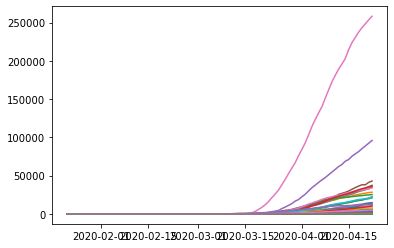

In [7]:
lines = plt.plot(tseries)
#plt.legend(lines, tseries.columns, loc='upper left');

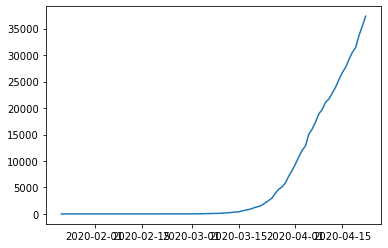

In [8]:
plt.plot(tseries['California']);

Looking at the number of new cases each day in California.

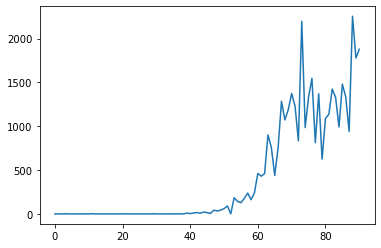

In [9]:
plt.plot(np.diff(tseries['California']));